In [217]:
import numpy as np
from scipy import io
from sklearn import linear_model
from scipy import stats
%pylab inline
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy.ndimage
from skimage import measure, morphology
import matplotlib.pyplot as plt
import nibabel as nib
import nilearn
from nilearn import plotting
plt.style.use('ggplot')
from scipy.stats import t
from scipy.stats import pearsonr
from scipy.stats import gamma
from scipy.ndimage import convolve
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [278]:
print(plt.style.available)

[u'seaborn-darkgrid', u'Solarize_Light2', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'fast', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


In [3]:
pwd

u'/home/chenxupeng/projects/computneuron/HW1'

question2

In [4]:
img = nib.load('HW1_data/perisample/filtered_func_data.nii.gz')
imgleft = nib.load('HW1_data/perisample/left.nii.gz')
imgright = nib.load('HW1_data/perisample/right.nii.gz')
r_tap = np.loadtxt('HW1_data/perisample/R_Tap.txt')
l_tap = np.loadtxt('HW1_data/perisample/L_Tap.txt')

In [5]:
#imshow(img.get_data()[:,:,29,0])

In [6]:
img.get_data()[:,:,:,:].shape

(64, 64, 36, 118)

In [7]:
sumlis = []
for i in range(36):
    sumlis.append(np.sum(imgleft.get_data()[:,:,i]))
np.array(sumlis)

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.99999998,  17.9999996 ,  19.99999955,  20.99999953,
        19.99999955,  16.99999962,   0.99999998,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

In [8]:
sumlis_ = []
for i in range(36):
    sumlis_.append(np.sum(imgright.get_data()[:,:,i]))
np.array(sumlis_)

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  13.99999969,  18.99999958,  19.99999955,
        18.99999958,  16.99999962,   0.99999998,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

In [9]:
r_tap[:,0]

array([   2.3,   35.9,   80.7,  125.5,  170.3,  203.9,  226.3,  248.7,
        282.3,  315.9])

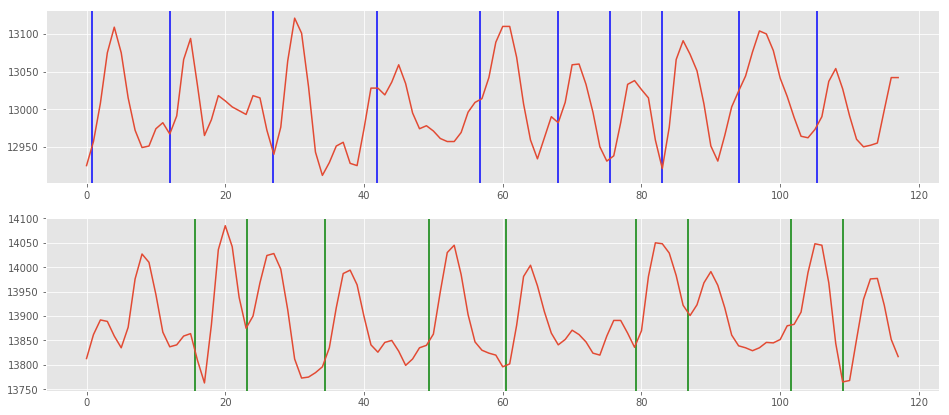

In [10]:
fig, ax = plt.subplots(2,1,figsize = (16,7))

for xc in r_tap[:,0]/3.:
    ax[0].axvline(x=xc, color='b', linestyle='-')
for xd in l_tap[:,0]/3.:
    ax[1].axvline(x=xd, color='g', linestyle='-')
layer=30
ax[0].plot(np.sum(img.get_data()[:,:,layer,][np.nonzero(imgleft.get_data()[:,:,layer])],axis=0))
ax[1].plot(np.sum(img.get_data()[:,:,layer,][np.nonzero(imgright.get_data()[:,:,layer])],axis=0))

Text(0.5,1,u'BOLD signal according to tap stimulus, layer 30')

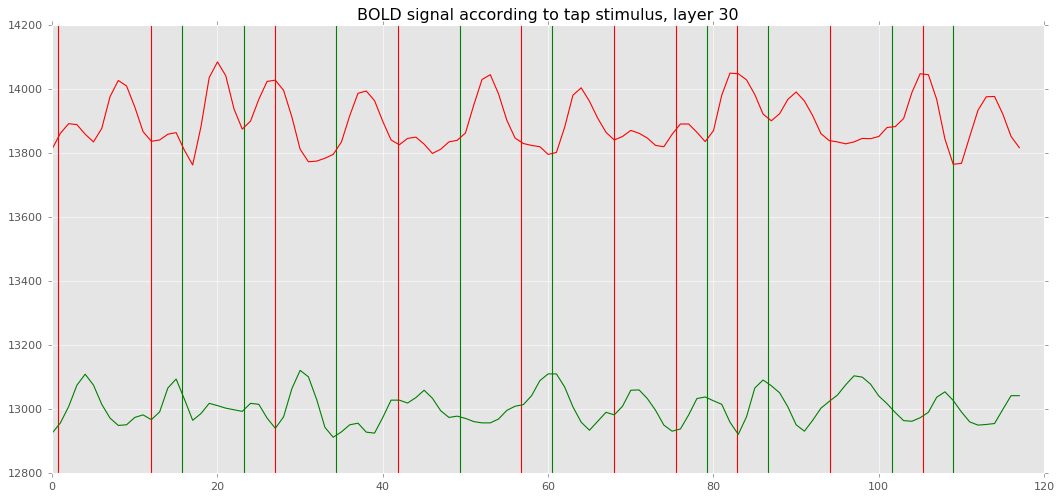

In [422]:
fig, ax = plt.subplots(1,figsize = (16,7))

for xc in r_tap[:,0]/3.:
    ax.axvline(x=xc, color='r', linestyle='-')
for xd in l_tap[:,0]/3.:
    ax.axvline(x=xd, color='g', linestyle='-')
layer=30
ax.plot(np.sum(img.get_data()[:,:,layer,][np.nonzero(imgleft.get_data()[:,:,layer])],axis=0),color='g')
ax.plot(np.sum(img.get_data()[:,:,layer,][np.nonzero(imgright.get_data()[:,:,layer])],axis=0),color='r')
ax.set_title('BOLD signal according to tap stimulus, layer 30')

In [11]:
img.get_data()[30,30,layer,0]

12350

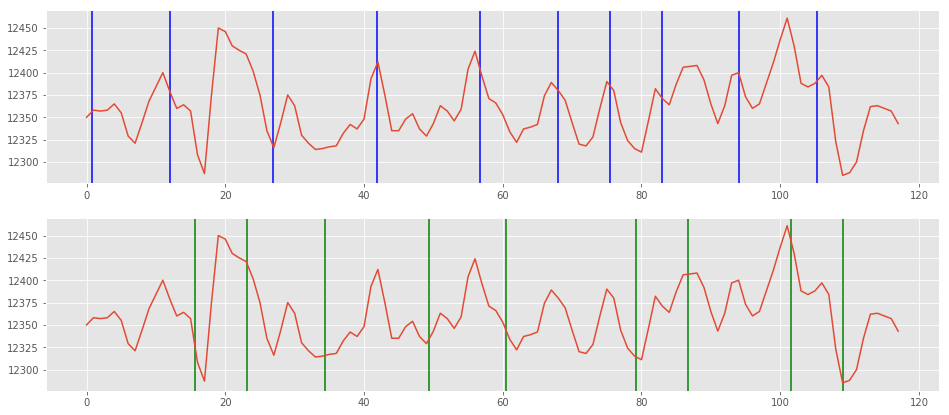

In [12]:
fig, ax = plt.subplots(2,1,figsize = (16,7))

for xc in r_tap[:,0]/3.:
    ax[0].axvline(x=xc, color='b', linestyle='-')
for xd in l_tap[:,0]/3.:
    ax[1].axvline(x=xd, color='g', linestyle='-')
layer=30
xlim=30
ylim=30
ax[0].plot(img.get_data()[:,:,layer,][xlim,ylim])
ax[1].plot(img.get_data()[:,:,layer,][xlim,ylim])

In [13]:
imgright.get_data().shape

(64, 64, 36)

fig, ax = plt.subplots(4,4,figsize = (16,16))
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(imgright.get_data()[:,:,4*i+j+16].T,cmap=cm.gray)

In [14]:
imgleft.get_data()[:,:,29].sum()

16.99999962002039

(64, 64, 118)


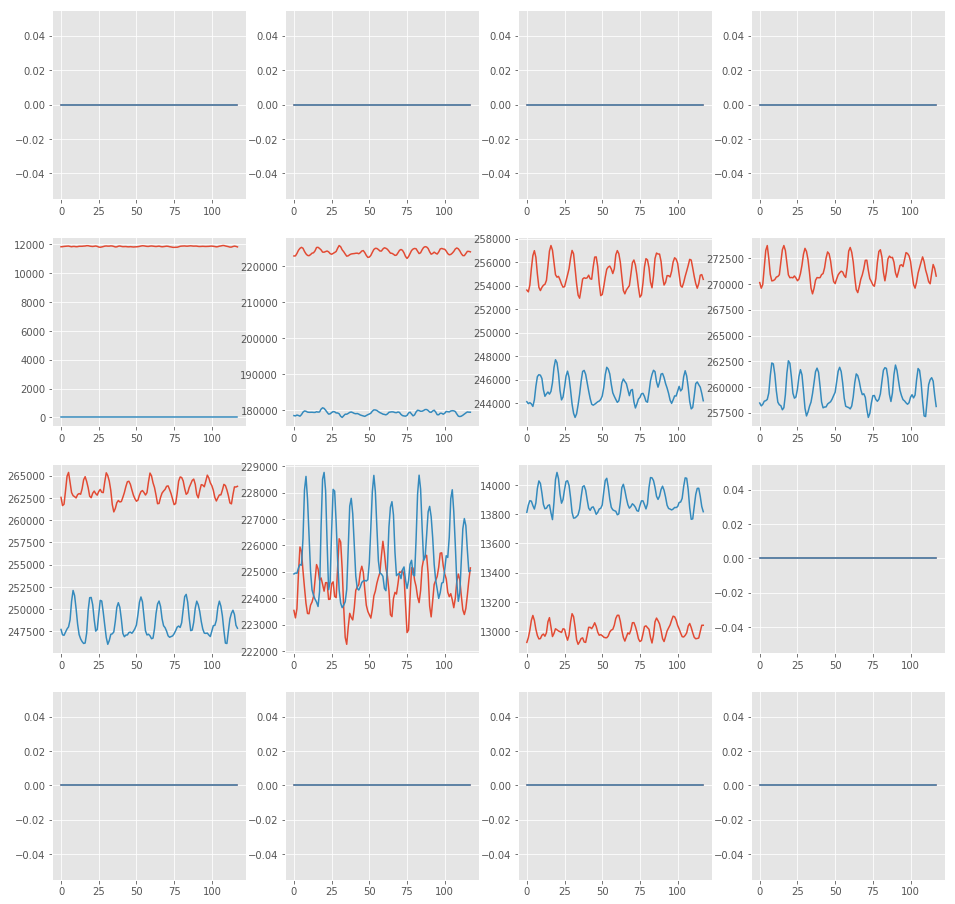

In [15]:
#第29层的118帧图
print img.get_data()[:,:,29,:].shape
fig, ax = plt.subplots(4,4,figsize = (16,16))
for i in range(4):
    for j in range(4):
        layer = 20+4*i+j
        ax[i,j].plot(np.sum(img.get_data()[:,:,layer,][np.nonzero(imgleft.get_data()[:,:,layer])],axis=0))
        ax[i,j].plot(np.sum(img.get_data()[:,:,layer,][np.nonzero(imgright.get_data()[:,:,layer])],axis=0))

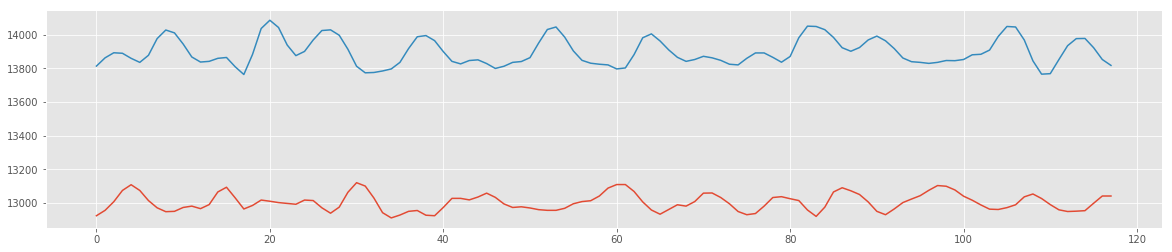

In [16]:
layer = 30
fig, ax = plt.subplots(figsize = (20,4))
ax.plot(np.sum(img.get_data()[:,:,layer,][np.nonzero(imgleft.get_data()[:,:,layer])],axis=0))
ax.plot(np.sum(img.get_data()[:,:,layer,][np.nonzero(imgright.get_data()[:,:,layer])],axis=0))

In [17]:
def draw_peri(layer):
    test1 =np.sum(img.get_data()[:,:,layer,][np.nonzero(imgleft.get_data()[:,:,layer])],axis=0)
    test2 =np.sum(img.get_data()[:,:,layer,][np.nonzero(imgright.get_data()[:,:,layer])],axis=0)
    fig, ax = plt.subplots(figsize = (20,4))
    ax.plot((test1[1:] - test1[:-1])/test1[:-1].astype('float'))
    ax.plot((test2[1:] - test2[:-1])/test2[:-1].astype('float'))

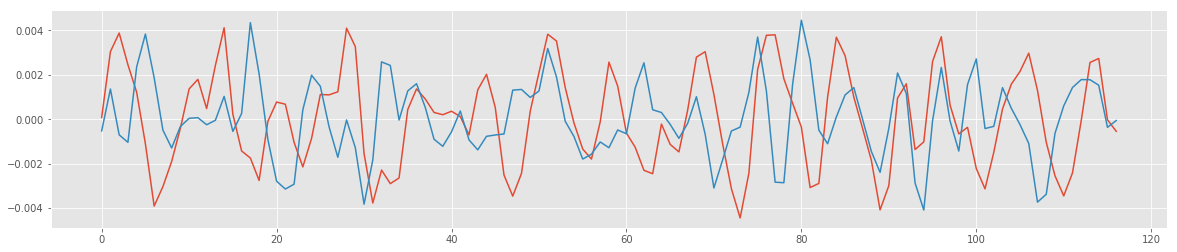

In [18]:
draw_peri(25)

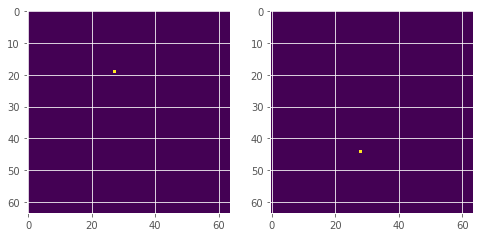

In [19]:
fig, ax = plt.subplots(1,2,figsize = (8,4))
ax[0].imshow(imgleft.get_data()[:,:,layer])
ax[1].imshow(imgright.get_data()[:,:,layer])

In [20]:
img.shape

(64, 64, 36, 118)

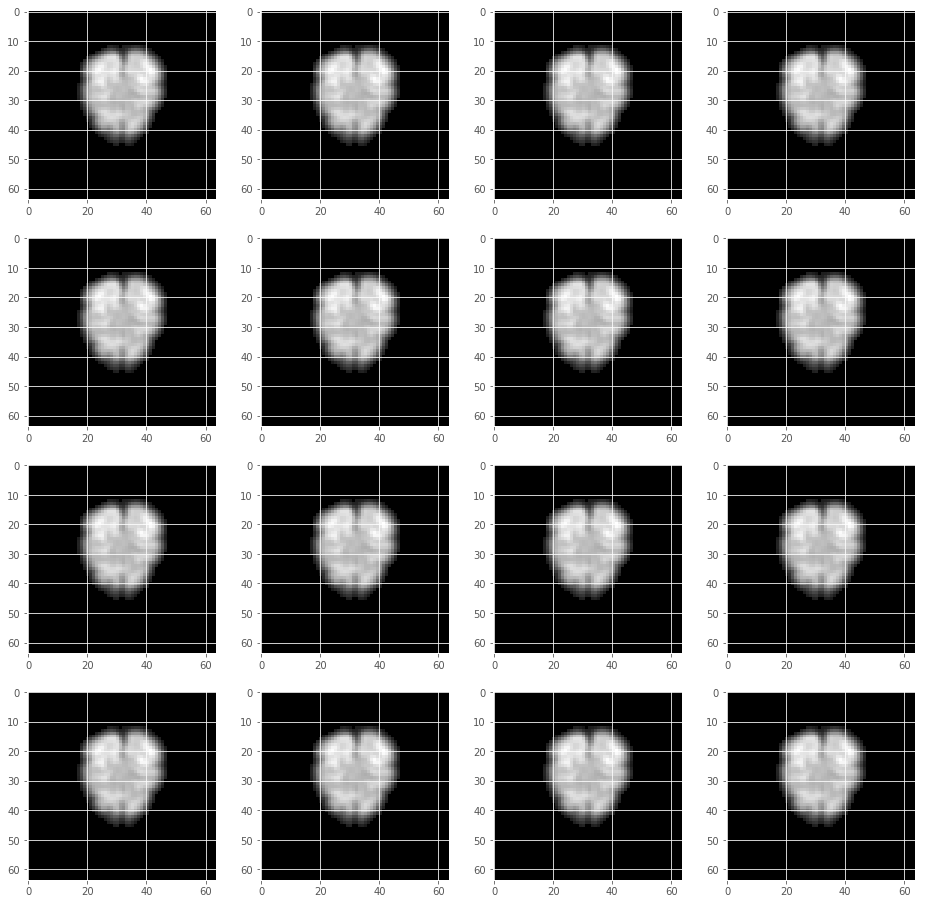

In [21]:
fig, ax = plt.subplots(4,4,figsize = (16,16))
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(img.get_data()[:,:,33,4*i+j].T,cmap=cm.gray)

In [22]:
#看某一层 某个区域的和在118个时刻的变化
def get_var(lef,rig,up,down,layer):
    '''
    lef,rig,up,down: range of region 0~64
    layer: the layer of brain 0~36
    '''
    sumlist = []
    for i in range(118):
        sumlist.append(np.sum(img.get_data()[:,:,layer,i][lef:rig,up:down]))
    return sumlist

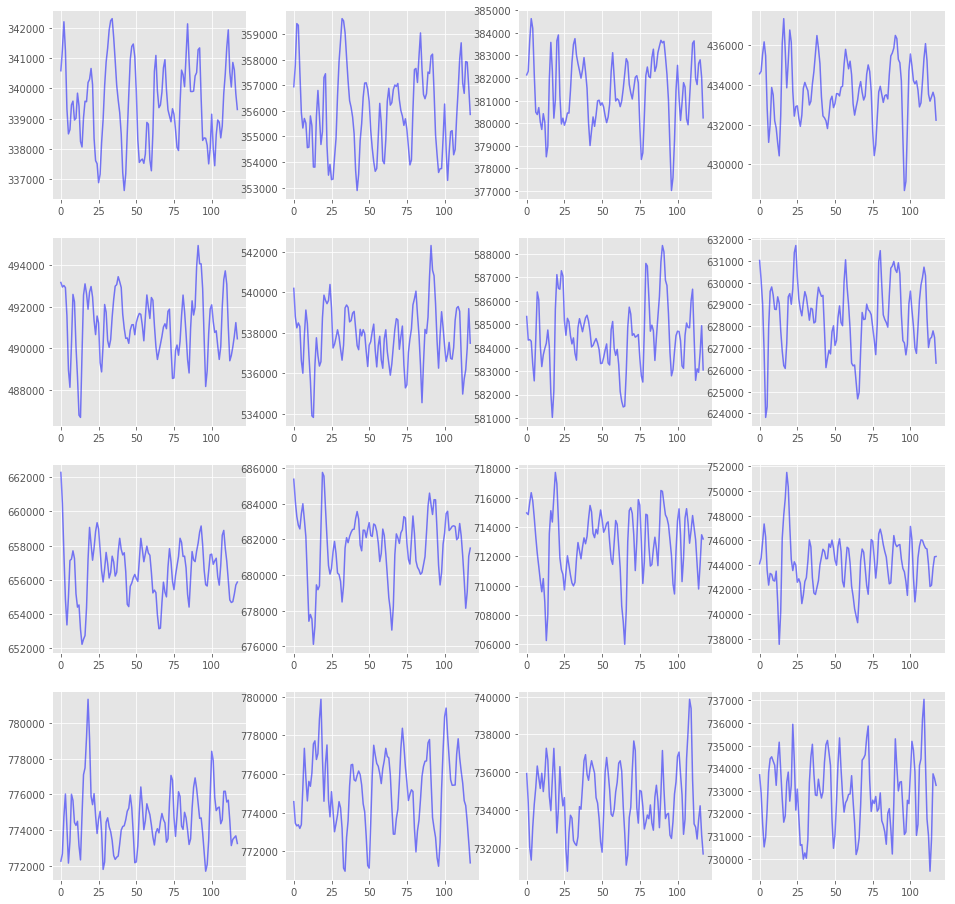

In [23]:
fig, ax = plt.subplots(4,4,figsize = (16,16))
for i in range(4):
    for j in range(4):
        ax[i,j].plot(get_var(24,32,24,32,i*4+j),'blue',alpha=0.5)

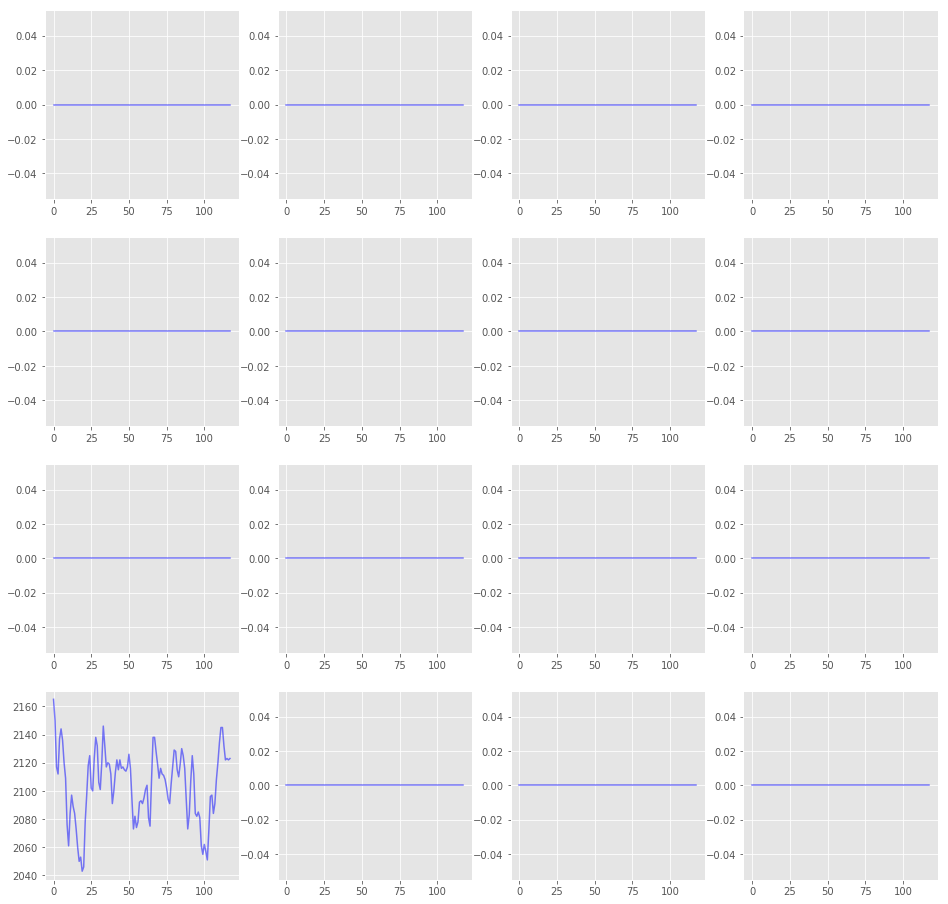

In [24]:
gap = 1
background = 33
fig, ax = plt.subplots(4,4,figsize = (16,16))
for i in range(4):
    for j in range(4):
        ax[i,j].plot(get_var(background+gap*i,background+gap*(i+1)
                             ,background+gap*j,background+gap*(j+1),1),'blue',alpha=0.5)

In [25]:
TR = 1
t = np.arange(1,20,TR)

In [26]:
h = gamma.pdf(6,t) -0.5*gamma.pdf(10,t) #HRF MODEL 为什么这样的参数？
h = h/max(h) # 归一化 最大为1 SCALE HRF TO HAVE MAX AMPLITUDE OF 1
trPerStim = 30  # TR PER STIMULUS ？ 是否需要修改？
nRepeat = 2  # OF STIMULUS REPEATES
nTRs = trPerStim*nRepeat + len(h)
#impulseTrain0 = np.zeros(nTRs).astype('int32')
# VISUAL STIMULUS
impulseTrainLight = np.zeros(nTRs).astype('int32')
impulseTrainLight[np.arange(1,1+trPerStim*nRepeat,trPerStim)] = 1
 
# AUDITORY STIMULUS
impulseTrainTone = np.zeros(nTRs).astype('int32')
impulseTrainTone[np.arange(5,5+trPerStim*nRepeat,trPerStim)] = 1
 
# SOMATOSENSORY STIMULUS
impulseTrainHeat = np.zeros(nTRs).astype('int32')
impulseTrainHeat[np.arange(9,9+trPerStim*nRepeat,trPerStim)] = 1

# COMBINATION OF ALL STIMULI
impulseTrainAll = impulseTrainLight + impulseTrainTone + impulseTrainHeat

# SIMULATE VOXELS WITH VARIOUS SELECTIVITIES
visualTuning = np.array([4, 0, 0]) # VISUAL VOXEL TUNING
auditoryTuning = np.array([0, 2, 0]) # AUDITORY VOXEL TUNING
somatoTuning = np.array([0, 0, 3]) #SOMATOSENSORY VOXEL TUNING
noTuning = np.array([1, 1 ,1]) # NON-SELECTIVE

In [27]:
gamma.pdf(6,t) -0.5*gamma.pdf(10,t)

array([ 0.00245605,  0.01464551,  0.04348254,  0.08545175,  0.1243943 ,
        0.1417065 ,  0.12909541,  0.09263737,  0.04695822,  0.00628347,
       -0.02125192, -0.03433924, -0.03612569, -0.03125498, -0.02381041,
       -0.01646778, -0.01051518, -0.00626404, -0.00350623])

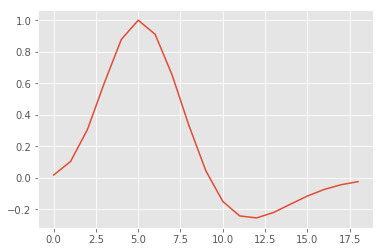

In [28]:
plt.plot(h)

In [29]:
beta = np.concatenate((visualTuning, 
        auditoryTuning, 
        somatoTuning, 
        noTuning)).reshape(4,3).T
 
# EXPERIMENT DESIGN / STIMULUS SEQUENCE
D = np.concatenate((impulseTrainLight,impulseTrainTone,impulseTrainHeat)).reshape(3,-1) 
# CREATE DESIGN MATRIX FOR THE THREE STIMULI
X = np.concatenate((np.convolve(D[0],h)[:nTRs+1],
np.convolve(D[1],h)[:nTRs+1],np.convolve(D[2],h)[:nTRs+1])).reshape(3,-1)  # X = D * h
X.shape

(3, 80)

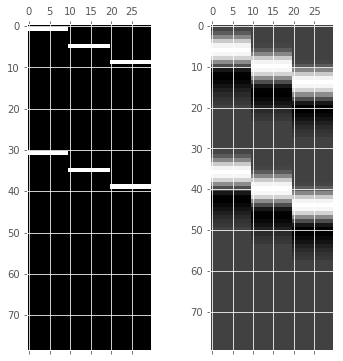

In [30]:
fig, ax = plt.subplots(1,2,figsize = (6,6))
ax[0].matshow(np.repeat(D.T,10,axis=1),cmap=cm.Greys_r)
ax[1].matshow(np.repeat(X.T,10,axis=1),cmap=cm.Greys_r)

In [31]:
# SIMULATE NOISELESS VOXELS' BOLD SIGNAL
# (ASSUMING VARIABLES FROM ABOVE STILL IN WORKSPACE)
y0 = X.T.dot(beta)

(-2, 4)

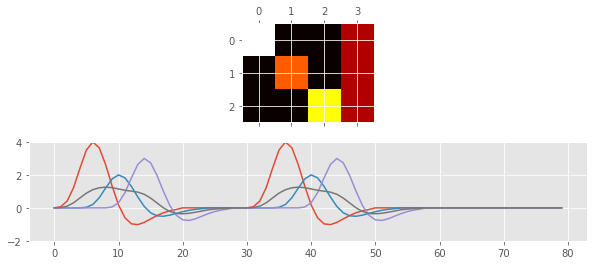

In [32]:
fig, ax = plt.subplots(2,1,figsize = (10,4))
ax[0].matshow(beta,cmap=cm.hot)
ax[1].plot(y0)
ax[1].set_ylim(-2,4)

## GLM

In [33]:
#SIMULATE NOISY VOXELS & ESTIMATE TUNING
#(ASSUMING VARIABLES FROM ABOVE STILL IN WORKSPACE)
 
SNR = 5. # (APPROX.) SIGNAL-TO-NOISE RATIO
noiseSTD = np.max(y0)/SNR  # NOISE LEVEL FOR EACH VOXEL
noise = np.random.randn(y0.shape[0]).dot(noiseSTD)
y = np.add(y0,np.repeat(noise,4).reshape(-1,4))

In [34]:
beta.shape
#y = X beta
#80 *3 3*4  80*4  这里的X给反了，再加一次转置
betaHat = (np.linalg.inv(X.dot(X.T)+np.random.randn(3,3)*0.00001).dot(X)).dot(y) 
# OLS 很容易遇到singular问题
# 这里先加点噪音  后续可以用ridge做fit 和 predict
yHat = X.T.dot(betaHat) # GLM PREDICTION

Text(0.5,1,u'Model Predictions')

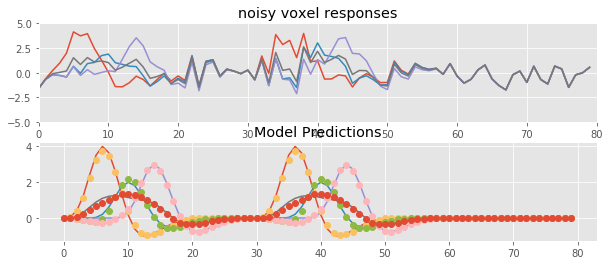

In [35]:
fig, ax = plt.subplots(2,1,figsize = (10,4))
ax[0].plot(y)
ax[0].set_ylim(-5,5)
ax[0].set_xlim(0,80)
ax[0].set_title('noisy voxel responses')
ax[1].plot(y0,'-')
ax[1].plot(yHat,'o')
ax[1].set_title('Model Predictions')

Text(0.5,1.05,u'Noisy Estimated Selectivity')

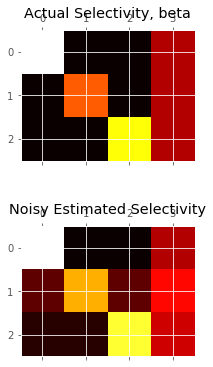

In [36]:
fig, ax = plt.subplots(2,1,figsize = (10,6))
fig.subplots_adjust(hspace=.5)
ax[0].matshow(beta,cmap=cm.hot)
ax[0].set_title('Actual Selectivity, beta')
ax[1].matshow(betaHat,cmap=cm.hot)
ax[1].set_title('Noisy Estimated Selectivity')

梳理思路：<br>
stimulus有了，做完卷积后可以作为X <br>  
y也有了，就是fMRI的每个体素，都可以用stimulus预测其响应值 <br>
这一步也可以不手写，用ridge预测，把beta返回出来 <br>
检验beta？ <br>
更复杂的模型？<br>

找到每层显著激活区 <br>
找一个用软件画图 <br>
如何remove regressor？ <br>

In [37]:
#80 *3 3*4  80*4

In [38]:
print r_tap[:,0].shape
print l_tap[:,0].shape

(10,)
(9,)


In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

##### Generate artificial data (2 regressors + constant)
result = sm.OLS(y, X).fit()
N = result.nobs
P = result.df_model
dfn, dfd = P, N - P - 1
F = result.mse_model / result.mse_resid
p = 1.0 - scipy.stats.f.cdf(F,dfn,dfd)
print 'F-statistic: {:.3f},  p-value: {:.5f}'.format( F, p )

可以返回各自的beta 的话可以把刺激合在一起？

准备X

In [45]:
#每个时间单位为三秒
t = 118
tspan  = np.arange(1,t)
X_1 = np.round(r_tap[:,0]/3.).astype('int')
X_2 = np.round(l_tap[:,0]/3.).astype('int')
stimulusmatrix = np.zeros(t*2).reshape(-1,2).astype('int32')
stimulusmatrix[X_1,0] = 1
stimulusmatrix[X_2,1] = 1

In [46]:
h = gamma.pdf(6,tspan) -0.5*gamma.pdf(10,tspan) #HRF MODEL 为什么这样的参数？
h = h/max(h) 
X = np.concatenate((np.convolve(stimulusmatrix.T[0],h)[:t],
np.convolve(stimulusmatrix.T[1],h)[:t])).reshape(2,-1)  # X = stimulus * h

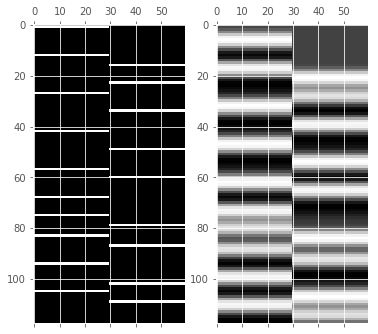

In [47]:
fig, ax = plt.subplots(1,2,figsize = (6,6))
ax[0].matshow(np.repeat(stimulusmatrix,30,axis=1),cmap=cm.Greys_r)
ax[1].matshow(np.repeat(X.T,30,axis=1),cmap=cm.Greys_r)

In [49]:
X.shape

(2, 118)

准备y:每层每个非零点的118帧的 y <br>
X 118*2 beta 2*1 y 118

In [50]:
wholedata = img.get_data()[:,:,:,:]

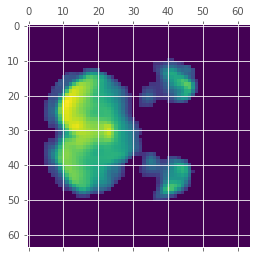

In [51]:
matshow(np.sum(wholedata[:,:,0,:],axis =2))

In [244]:
def testonelaye(data):
    '''
    层数已经定好的data
    data:[:,:,:]
    逐点检测该层有值点的结果
    1 118帧求和，确定nonezero点个数N
    wholey shape: N*118
    '''
    layer_data = data[:,:,:][np.sum(data,axis =2) !=0]
    count = data[:,:,:][np.sum(data,axis =2) !=0].shape[0]
    return layer_data,count,np.where(np.sum(data,axis =2) !=0)

In [53]:
listlayernonzero = []   #每层待检验的点个数
for i in range(36):
    listlayernonzero.append(testonelaye(wholedata[:,:,i,:])[1])

In [218]:
def linetest(X,y):
    '''
    X: 118*2
    y: 118
    '''
    #X += 0.001*np.random.randn(X.shape[0]*X.shape[1]).reshape(X.shape[0],X.shape[1])
    result = sm.OLS(y, X).fit()
    '''
    N = result.nobs
    P = result.df_model
    dfn, dfd = P, N - P - 1
    F = result.mse_model / result.mse_resid
    p = 1.0 - scipy.stats.f.cdf(F,dfn,dfd)
    beta = result.params[0]
    C = np.linalg.inv( X.T.dot(X))
     # multiply by the MSE of the residual
    C *= result.mse_resid
     # take the square root
    SE = np.sqrt(C)
    se = SE[0,0]
    t = beta / SE
    双边 t检验 p value
    '''
    tt = result.tvalues
    df = result.df_resid
    p1 = t.sf(tt[0], df)
    p2 = t.sf(tt[1], df)
    #r2 = r2_score()
    return p1,p2

In [139]:
np.ones(118).shape

(118,)

In [220]:
linetest(np.concatenate((X,np.ones(118).reshape(1,-1)),axis =0).T,testonelaye(wholedata[:,:,i,:])[0][j])

(0.7474030670633558, 0.74170159915529443)

In [355]:
plist = {}
for i in range(36):
    plist[i] = {}
    for j in range(listlayernonzero[i]):
        plist[i][j] = linetest(np.concatenate((X,np.ones(118).reshape(1,-1)),axis =0).T,testonelaye(wholedata[:,:,i,:])[0][j])

In [227]:
import pickle
with open('pvaluelist', 'wb') as f:
    pickle.dump(plist, f)

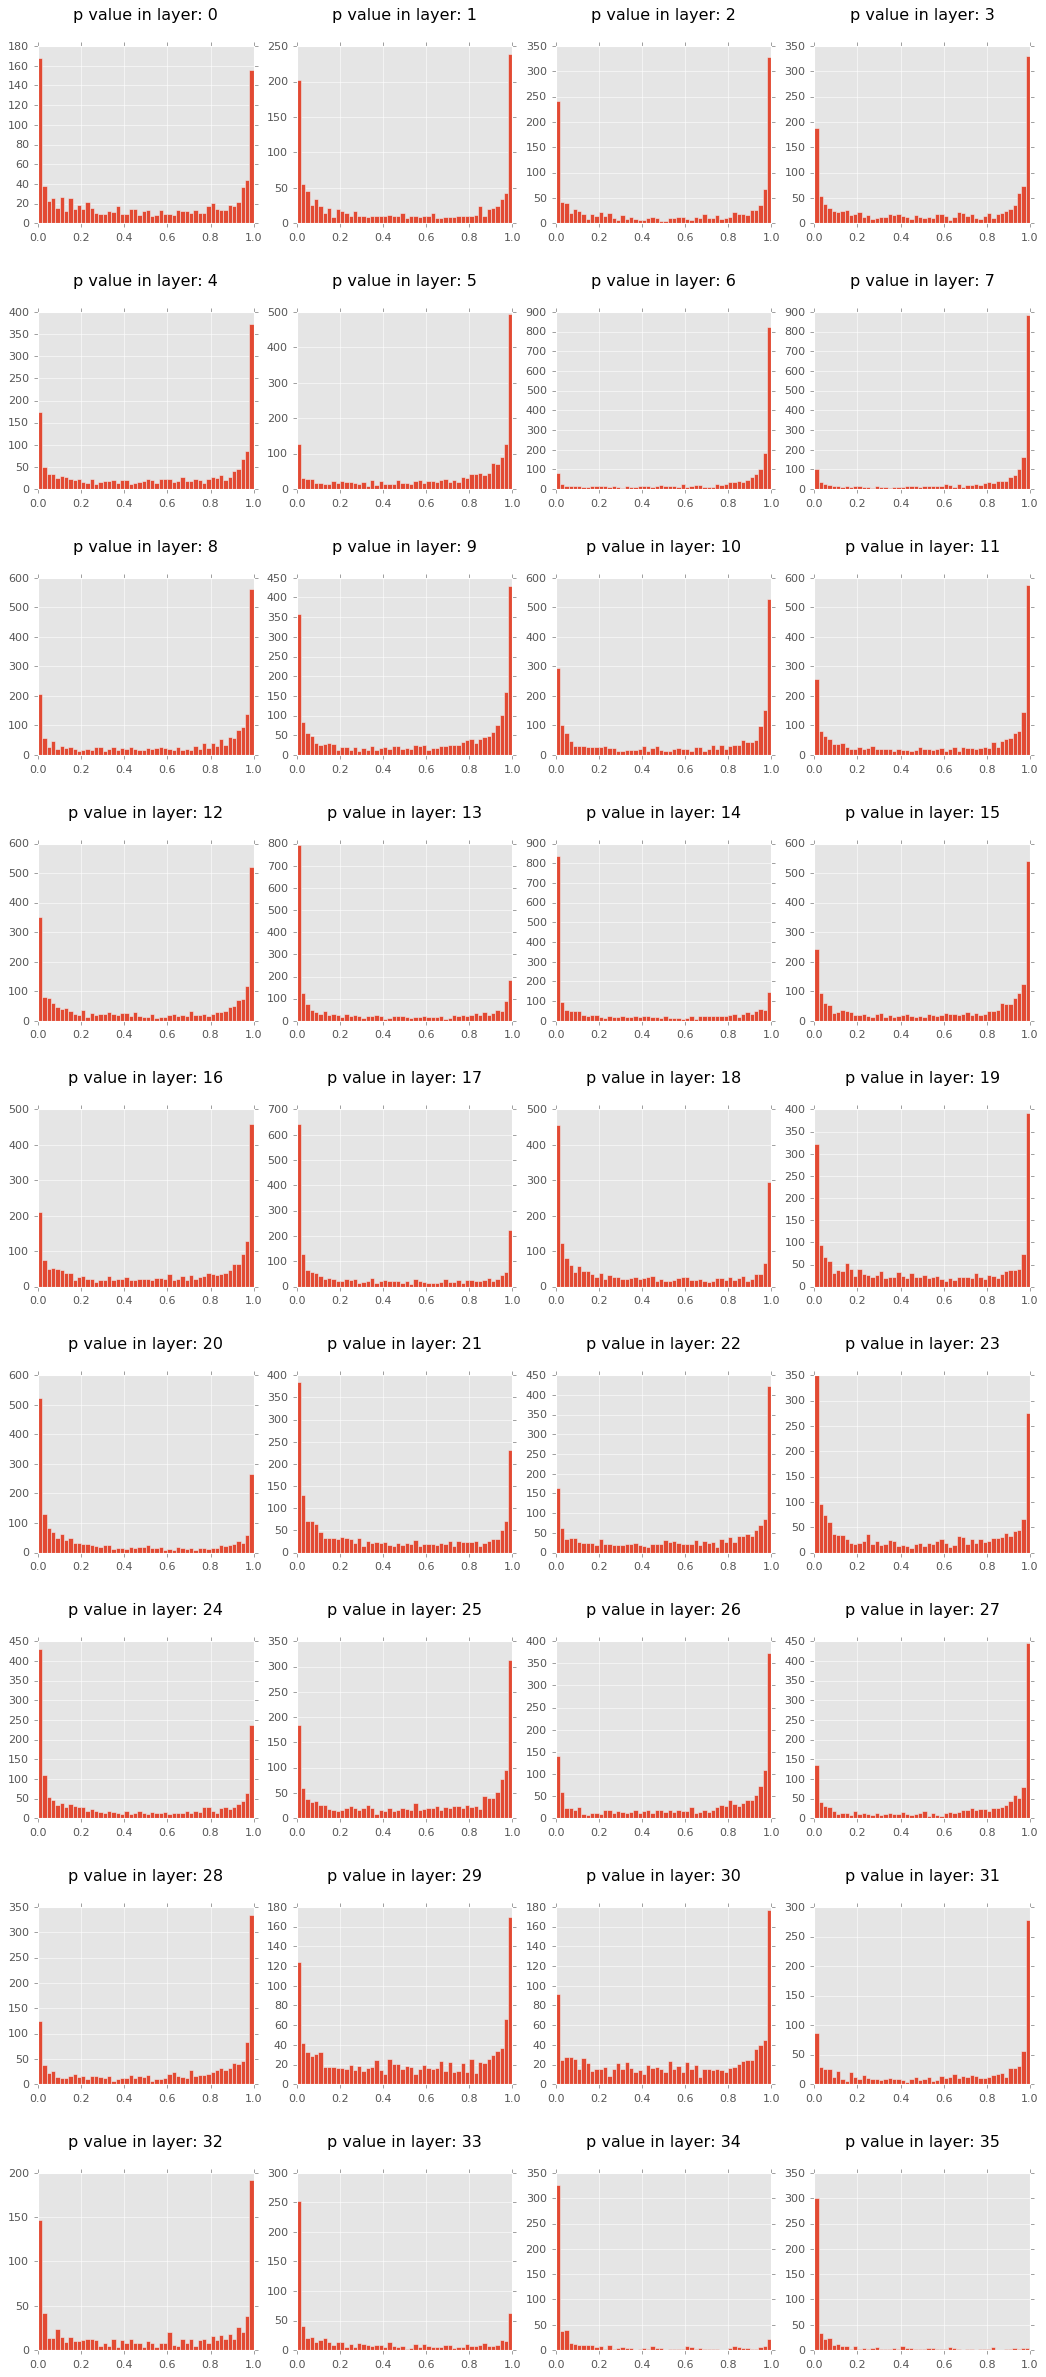

In [356]:
fig, ax = plt.subplots(9,4,figsize = (16,36))
fig.subplots_adjust(hspace=.5)
for i in range(9):
    for j in range(4):
        ax[i,j].hist(np.array([ value for (key,value) in plist[i*4+j].iteritems()])[:,0],bins =50)
        ax[i,j].set_title('p value in layer: %d'%(i*4+j),y=1.12 )

p value threshold: 0.05/whole voxels 7.76445741971551e-07

In [234]:
sumnonzero = 0
for i in range(36):
    sumnonzero += listlayernonzero[i]

In [237]:
thresholdp = 0.05/sumnonzero

In [254]:
#找X_1的 右手的  即左脑符合条件的
leftroi = {}
rightroi = {}
for i in range(36):
    leftroi[i]=np.where(np.array([ value for (key,value) \
            in plist[i].iteritems()])[:,0] <=thresholdp)[0]
    rightroi[i]=np.where(np.array([ value for (key,value) \
            in plist[i].iteritems()])[:,1] <=thresholdp)[0]

In [249]:
nonzeroindex = {}
for i in range(36):
    nonzeroindex[i] = testonelaye(wholedata[:,:,i,:])[2]

In [277]:
#nonzeroindex[0][0]  第零层的非零区  leftroi以及rightroi确定的
print(plt.style.available)

In [290]:
np.where(wholezero==1)[0],np.where(wholezero==1)[1]

(array([33, 41, 41]), array([15, 25, 26]))

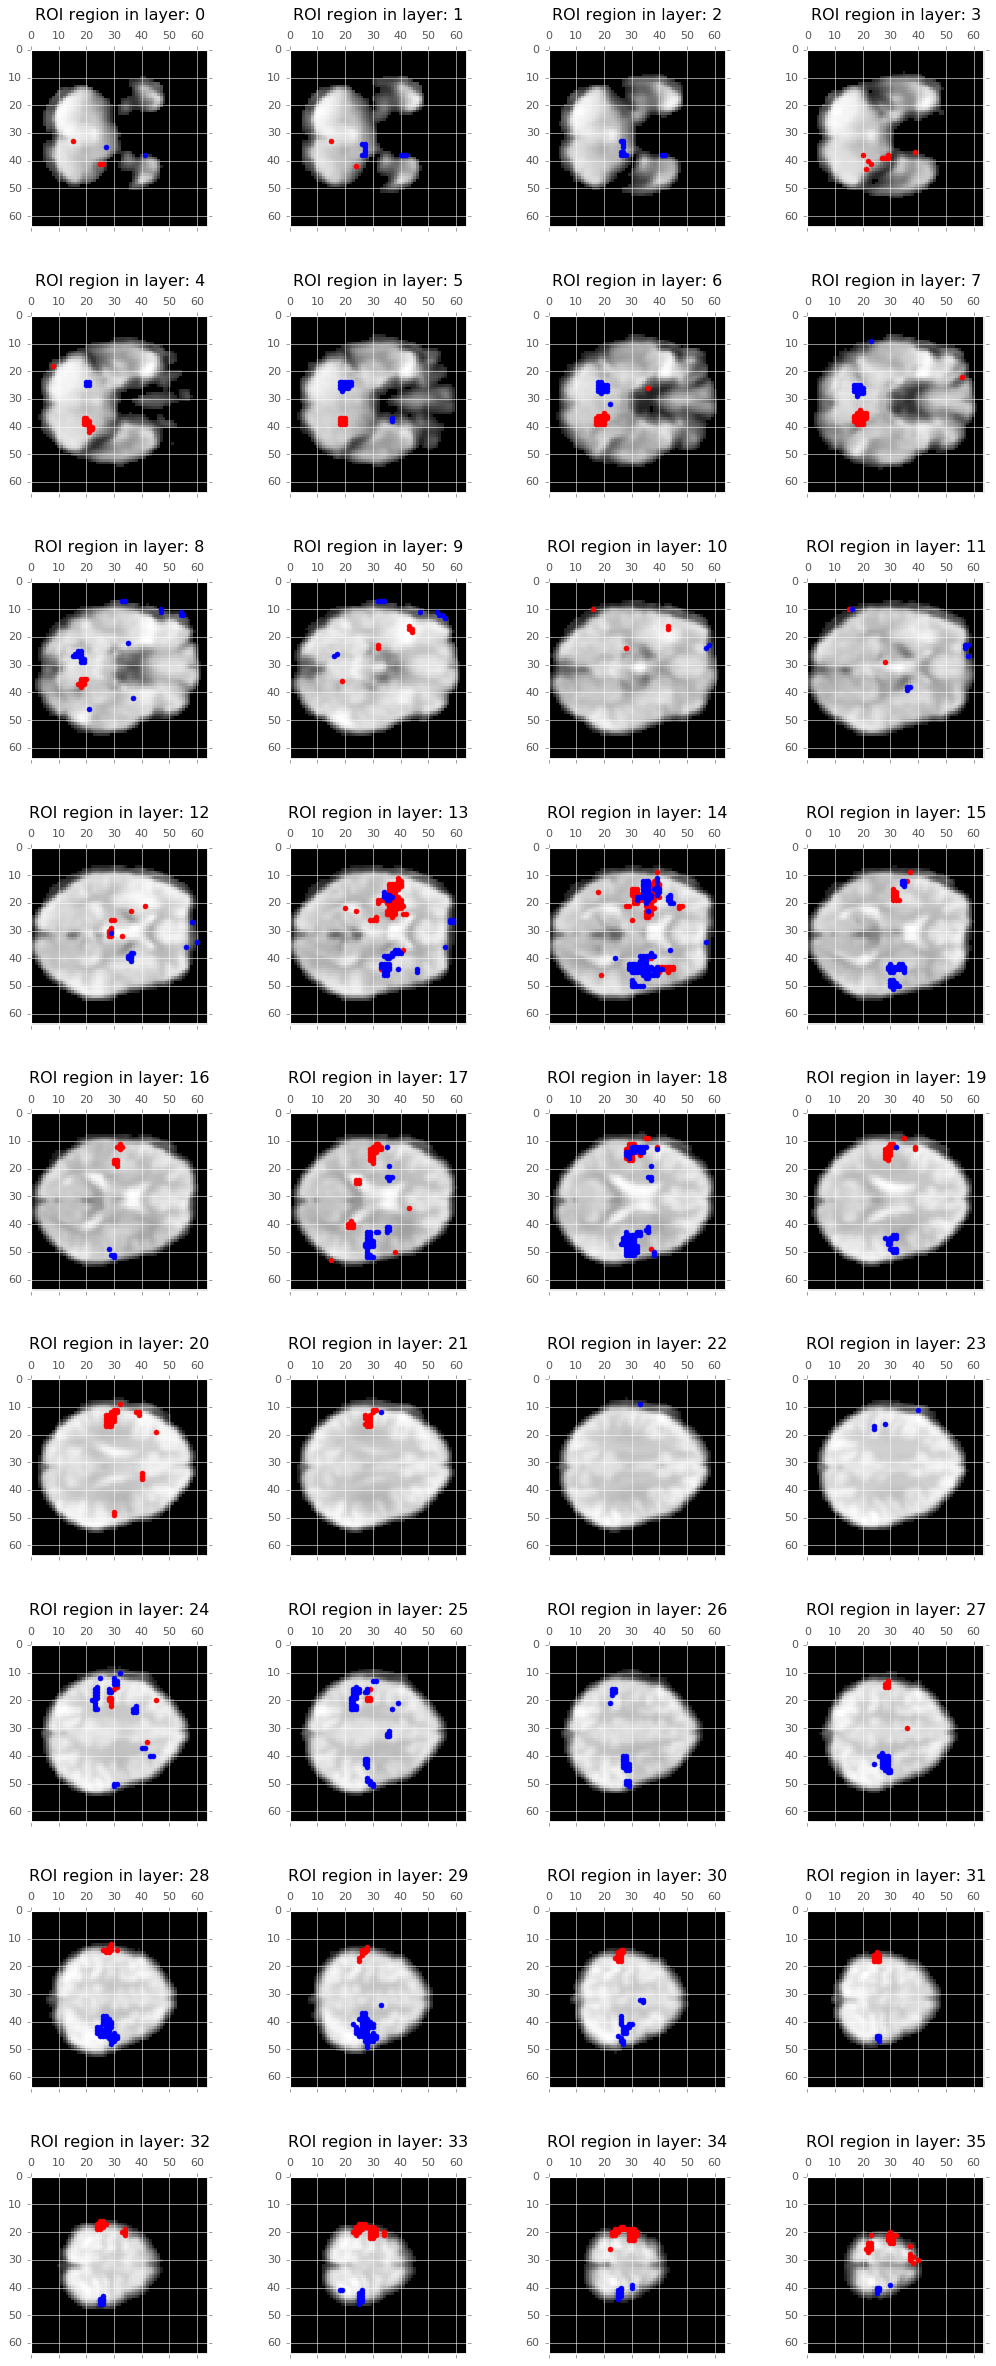

In [348]:
#某层 某时刻的roi区域
plt.style.use('ggplot')
fig, ax = plt.subplots(9,4,figsize = (16,36))
fig.subplots_adjust(hspace=.5)
for i in range(9):
    for j in range(4):
        layer = i*4+j
        wholezero = np.zeros(64*64).reshape(64,64)
        wholezero[nonzeroindex[layer][0][leftroi[layer]],nonzeroindex[layer][1][leftroi[layer]]] = 1
        wholezero[nonzeroindex[layer][0][rightroi[layer]],nonzeroindex[layer][1][rightroi[layer]]] = 2
        ax[i,j].matshow(wholedata[:,:,layer,0],cmap =cm.Greys_r)
        ax[i,j].set_xlim(0,64)
        ax[i,j].set_ylim(64,0)
        ax[i,j].scatter(np.where(wholezero==1)[1],np.where(wholezero==1)[0],color='r')
        ax[i,j].scatter(np.where(wholezero==2)[1],np.where(wholezero==2)[0],color='b')
        ax[i,j].set_title('ROI region in layer: %d'%layer,y=1.14 )

In [255]:
leftroi[0]

array([606, 867, 868])

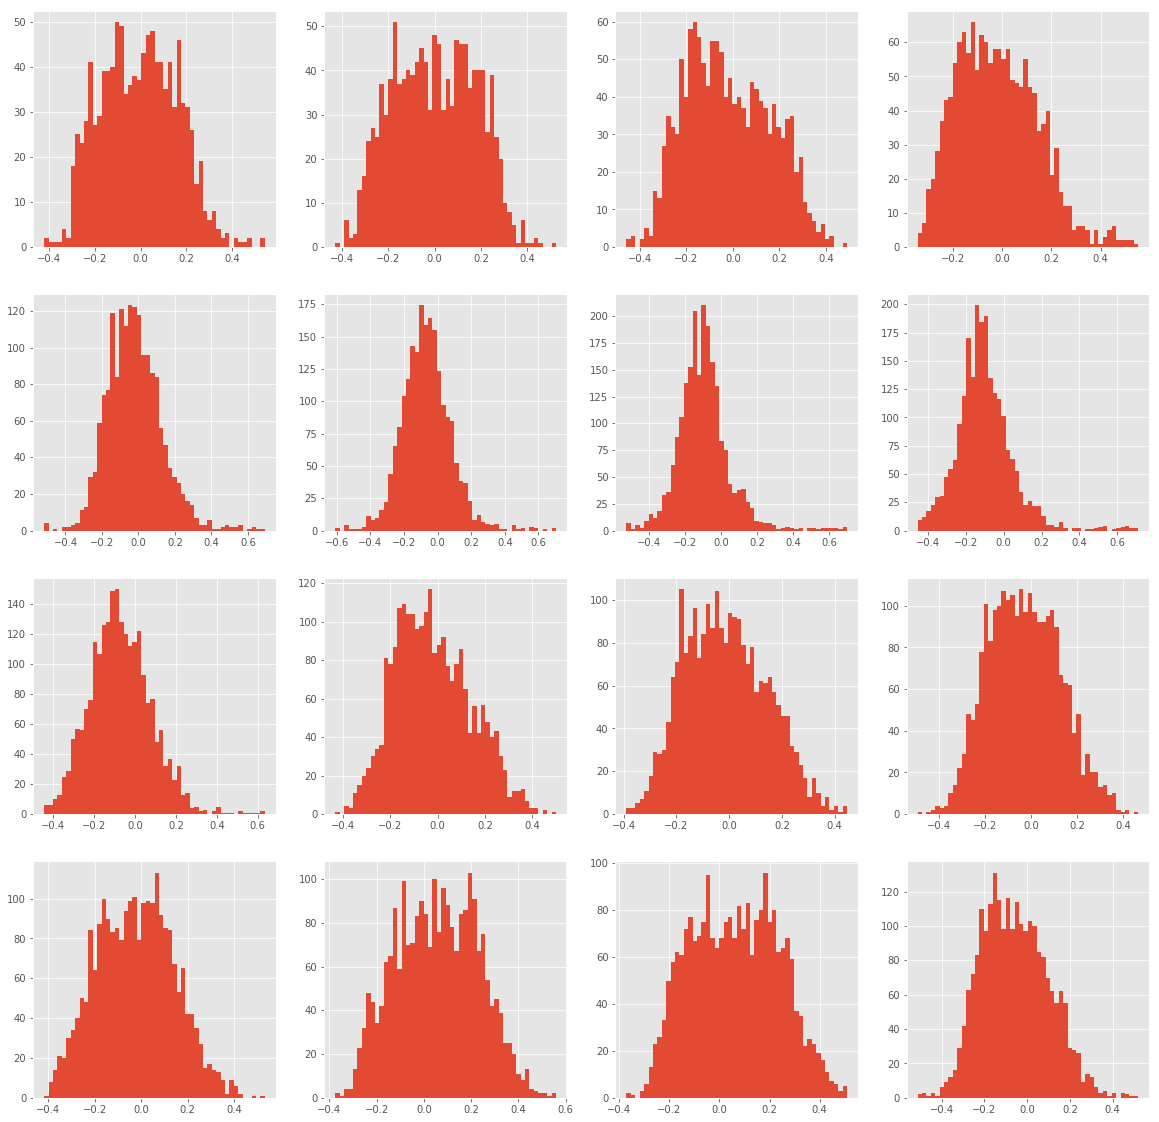

In [100]:
pcclist = {}
for i in range(16):
    pcclist[i] = {}
    for j in range(listlayernonzero[i]):
        pcclist[i][j] =pearsonr(X[0],testonelaye(wholedata[:,:,i,:])[0][j])
fig, ax = plt.subplots(4,4,figsize = (20,20))
for i in range(4):
    for j in range(4):
        ax[i,j].hist(np.array([value for (key,value) in pcclist[4*i+j].iteritems()])[:,0],bins =50)

(array([ 2.,  1.,  2.,  0.,  3.,  3.,  2.,  5.,  2.,  5.,  5.,  2.,  2.,
         1.,  1.,  7.,  4.,  5.,  6.,  4.,  5.,  2.,  6.,  9.,  4.,  2.,
         6.,  7.,  2.,  2.,  3.,  0.,  1.,  1.,  2.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1884.  ,  1886.42,  1888.84,  1891.26,  1893.68,  1896.1 ,
         1898.52,  1900.94,  1903.36,  1905.78,  1908.2 ,  1910.62,
         1913.04,  1915.46,  1917.88,  1920.3 ,  1922.72,  1925.14,
         1927.56,  1929.98,  1932.4 ,  1934.82,  1937.24,  1939.66,
         1942.08,  1944.5 ,  1946.92,  1949.34,  1951.76,  1954.18,
         1956.6 ,  1959.02,  1961.44,  1963.86,  1966.28,  1968.7 ,
         1971.12,  1973.54,  1975.96,  1978.38,  1980.8 ,  1983.22,
         1985.64,  1988.06,  1990.48,  1992.9 ,  1995.32,  1997.74,
         2000.16,  2002.58,  2005.  ]),
 <a list of 50 Patch objects>)

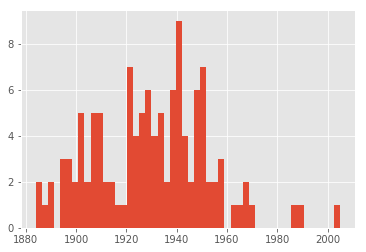

In [105]:
hist(testonelaye(wholedata[:,:,i,:])[0][j],bins = 50)

In [362]:
layer = 12
leftreg = nonzeroindex[layer][0][leftroi[layer]],nonzeroindex[layer][1][leftroi[layer]]
rightreg = nonzeroindex[layer][0][rightroi[layer]],nonzeroindex[layer][1][rightroi[layer]]

In [363]:
leftreg

(array([21, 23, 26, 26, 29, 30, 30, 31, 31, 32, 32, 32]),
 array([41, 36, 29, 30, 29, 28, 29, 28, 29, 28, 29, 33]))

In [409]:
boldleft = np.sum(wholedata[:,:,layer,:][leftreg],axis=0)
boldright = np.sum(wholedata[:,:,layer,:][rightreg],axis=0)

In [366]:
left_tap_time = np.array([47.1,69.5,103.1,147.9,181.5,237.5,259.9,304.7,327.1])
right_tap_time =np.array([2.3,35.9,80.7,125.5,170.3,203.9,226.3,248.7,282.3,315.9])

In [385]:
left_tap_TR = np.round(left_tap_time / 3.)
right_tap_TR = np.round(right_tap_time / 3.)
num_pre_bins = 4
num_post_bins = 14

In [417]:
for s in np.arange(1,2):
    if s == 1:
        bold = boldleft;
    else:
        bold = boldright;
    for t in np.arange(1,2):
        if t == 1:
            tap_TR = left_tap_TR; 
        else:
            tap_TR = right_tap_TR;
        segment = np.zeros((num_pre_bins + num_post_bins - 1, len(tap_TR)))
        for i in np.arange(1,118):
            if tap_TR[tap_TR <= i].shape[0] !=0:
                before_event_TR = np.max(tap_TR[tap_TR <= i])
                before_event_idx = np.max(tap_TR[tap_TR <= i])
                if i - before_event_TR + num_pre_bins < (num_pre_bins + num_post_bins - 1):
                    print i
                    segment[int(i - before_event_TR + num_pre_bins), int(before_event_idx)] = bold[i]
                    
                else: 
                    after_event_TR = np.min(tap_TR(tap_TR > i))
                    after_event_idx = np.min(tap_TR(tap_TR > i))
                    if i - after_event_TR + num_pre_bins > 0:
                        print 2
                        segment[int(i - after_event_TR + num_pre_bins), int(after_event_idx)] = bold[i]

16


IndexError: index 16 is out of bounds for axis 1 with size 9

In [419]:
bold.shape

(118,)

In [414]:
i - before_event_TR + num_pre_bins

4.0

In [393]:
np.zeros((num_pre_bins + num_post_bins - 1,10))

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [383]:
max(right_tap_TR[right_tap_TR <= 80])

75.0